<a href="https://colab.research.google.com/github/TAlkam/predicting-customer-churn/blob/main/Predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tursun Alkam

# **1. Introduction**

**1.1 Project Goal**
The goal of this project is to predict customer churn using a machine learning model. Customer churn prediction helps businesses identify customers who are likely to stop using their services, enabling them to take proactive measures to retain these customers and reduce losses.


**1.2 Importance of Churn Prediction**
Customer churn is a significant issue for many businesses, particularly in subscription-based industries. Predicting churn allows businesses to understand which customers are at risk of leaving and to implement strategies to retain them, thereby increasing customer lifetime value and overall profitability.


**1.3 Business Understanding**
Objective: Reduce customer churn to increase revenue and improve customer retention.


**Business Need:** The retail business needs a model to predict which customers are likely to churn so that targeted marketing strategies can be implemented to retain them.


# **2. Data Understanding**

**2.1 Find Data**
We used a publicly available dataset: "Customer Churn Dataset" from Kaggle.


**2.2 Examine Data**
Load the Dataset: Load the dataset and inspect the columns and data types.

**2.3 Graphical Representation**
Visualizations help understand the distribution and relationships between the response variable (Churn) and predictor variables.

**2.4 Non-Graphical Representation**

In [48]:
from google.colab import files
uploaded = files.upload()
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Load the dataset
df = pd.read_csv('customer_churn.csv')

# Check the unique values in the target column and their distribution
print("Unique values in 'Churn':", df['Churn'].unique())
print("Distribution in the entire dataset:")
print(df['Churn'].value_counts())


Unique values in 'Churn': [1 0]
Distribution in the entire dataset:
Churn
0    750
1    150
Name: count, dtype: int64


2.3 Graphical Representation
Visualizations help understand the distribution and relationships between the response variable (Churn) and predictor variables.

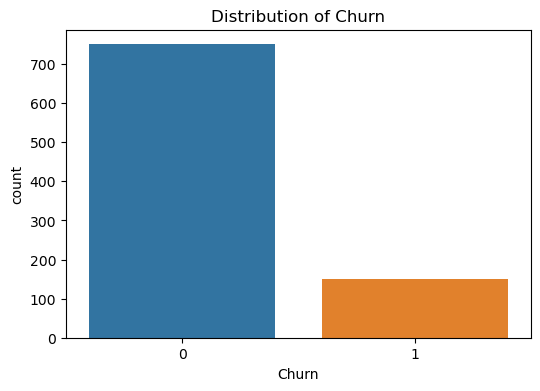

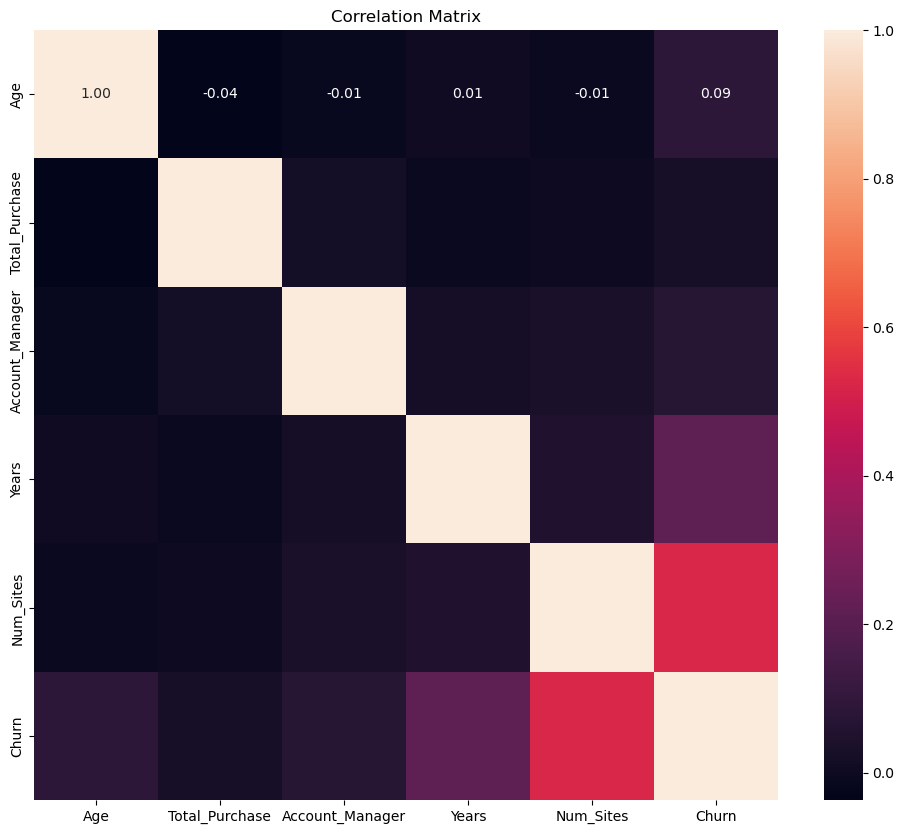

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the customer churn dataset
df_customer_churn = pd.read_csv('customer_churn.csv')

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_customer_churn)
plt.title('Distribution of Churn')
plt.show()

# Plot correlations only for numeric columns
plt.figure(figsize=(12, 10))
numeric_cols = df_customer_churn.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_customer_churn[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Here's what the plot reveals:

**Class 0 (Non-Churned Customers):**

The taller bar represents the count of customers who did not churn. This count is significantly higher compared to the other class, indicating that most customers in the dataset did not churn.

**Class 1 (Churned Customers):**

The shorter bar represents the count of customers who churned. This count is much lower, indicating that only a small fraction of customers in the dataset churned.

**Interpretation**

Imbalance in Data: The dataset is imbalanced, with many more non-churned customers (class 0) than churned customers (class 1). This imbalance is common in churn datasets as typically, the number of customers who remain with a service is higher than those who leave.

Implications for Modeling

**Handling Imbalance:** When training machine learning models, it's crucial to handle this imbalance to avoid biased models that may predict the majority class (non-churn) more frequently. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique), under-sampling, or using appropriate evaluation metrics like F1 score, precision-recall curves, or ROC-AUC can help address this imbalance.

**2.4 Non-Graphical Representation**

In [50]:
# Summary statistics
print(df_customer_churn.describe())

# Correlation with target variable
print(df_customer_churn[numeric_cols].corr()['Churn'].sort_values(ascending=False))


              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  
Churn              1.000000
Num_Sites          0.525398
Years              0.214329
Age                0.085926
Accou

# **3. Data Preprocessing**

**3.1 Applying SMOTE To Create and Balance the Synthetic Dataset**

Given the imbalance in the dataset, we applied the SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes. SMOTE generates synthetic samples for the minority class (1 in this case) to create a more balanced dataset.

In [51]:
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create a synthetic dataset with 1000 samples, 20 features, and a 90-10 class imbalance
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                                               n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

# Convert to DataFrame for consistency
df_synthetic = pd.DataFrame(X_synthetic, columns=[f'feature_{i}' for i in range(20)])
df_synthetic['Churn'] = y_synthetic

# Check the initial distribution
print("Initial distribution in synthetic dataset:")
print(df_synthetic['Churn'].value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_synthetic, y_synthetic)

# Convert the balanced dataset back to a DataFrame
df_synthetic_balanced = pd.DataFrame(X_smote, columns=[f'feature_{i}' for i in range(20)])
df_synthetic_balanced['Churn'] = y_smote

# Check the distribution after SMOTE
print("Distribution after SMOTE:")
print(df_synthetic_balanced['Churn'].value_counts())

# Save the balanced dataset to a CSV file
df_synthetic_balanced.to_csv('synthetic_dataset_balanced.csv', index=False)


Initial distribution in synthetic dataset:
Churn
0    900
1    100
Name: count, dtype: int64
Distribution after SMOTE:
Churn
0    900
1    900
Name: count, dtype: int64


**3.2 Load and Rename the Columns in the Balanced Dataset**

In [52]:
# Load the balanced synthetic dataset
df_synthetic_balanced = pd.read_csv('synthetic_dataset_balanced.csv')

# Rename the columns with meaningful names
df_synthetic_balanced.columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'feature_19', 'Churn'
]

# Save the updated dataset to a new CSV file
df_synthetic_balanced.to_csv('synthetic_dataset_labeled_balanced.csv', index=False)

# Check the updated dataset
print(df_synthetic_balanced.head())

# Download the labeled CSV file
from google.colab import files
files.download('synthetic_dataset_labeled_balanced.csv')


     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -0.429244      -2.211862  0.189756    0.588553  0.820374     -0.180392   
1 -0.045512      -2.084113 -3.189191   -0.424236 -2.472718      0.508269   
2  0.252195       1.617045  1.565132   -1.970309  2.048682      0.509295   
3  1.725694      -0.516117  2.210866    0.121844  2.667175     -1.059212   
4 -0.749416       1.106232 -0.664455    0.337766 -0.054664      0.552905   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0      -1.150654         1.471709        0.701585     -0.833474  ...   
1      -2.850971         0.911854        0.472527     -1.210002  ...   
2      -0.238676         1.445465        0.673300     -0.529416  ...   
3       0.107509         1.527901        0.705332     -0.442889  ...   
4      -1.497095         1.233776        0.597581     -0.871460  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0     0.702818    -0.225999       

**3. 3 Perform EDA on the Balanced Dataset**

In [53]:
# Upload the file
uploaded = files.upload()

# Load the labeled synthetic dataset
df_synthetic_labeled_balanced = pd.read_csv('synthetic_dataset_labeled_balanced.csv')

# Display the first few rows to verify
df_synthetic_labeled_balanced.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,feature_19,Churn
0,-0.429244,-2.211862,0.189756,0.588553,0.820374,-0.180392,-1.150654,1.471709,0.701585,-0.833474,...,0.702818,-0.225999,1.533434,1.372848,0.673782,0.742188,0.944224,-0.266652,1.401753,0
1,-0.045512,-2.084113,-3.189191,-0.424236,-2.472718,0.508269,-2.850971,0.911854,0.472527,-1.210002,...,-2.126279,1.908717,1.724697,3.926238,0.736881,3.447367,2.551819,0.287329,-0.842841,0
2,0.252195,1.617045,1.565132,-1.970309,2.048682,0.509295,-0.238676,1.445465,0.673300,-0.529416,...,1.758406,-1.076195,-0.770425,-0.616071,0.528587,-0.516697,0.107330,0.184859,2.090307,0
3,1.725694,-0.516117,2.210866,0.121844,2.667175,-1.059212,0.107509,1.527901,0.705332,-0.442889,...,2.289787,-1.482342,2.124556,-0.500261,0.504980,-1.048914,-0.217528,-0.179620,2.497511,0
4,-0.749416,1.106232,-0.664455,0.337766,-0.054664,0.552905,-1.497095,1.233776,0.597581,-0.871460,...,-0.048795,0.320768,0.200699,-0.936592,0.644399,1.366224,1.281389,-0.344477,0.748926,0


**3. 4 Perform EDA**

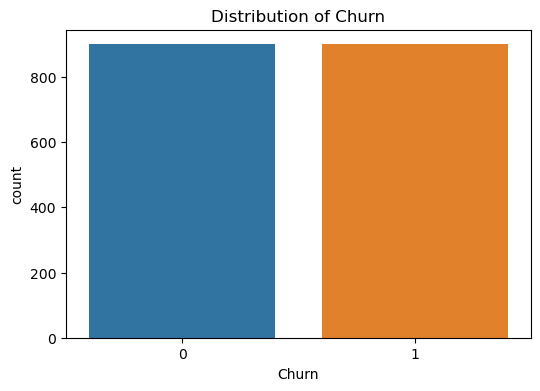

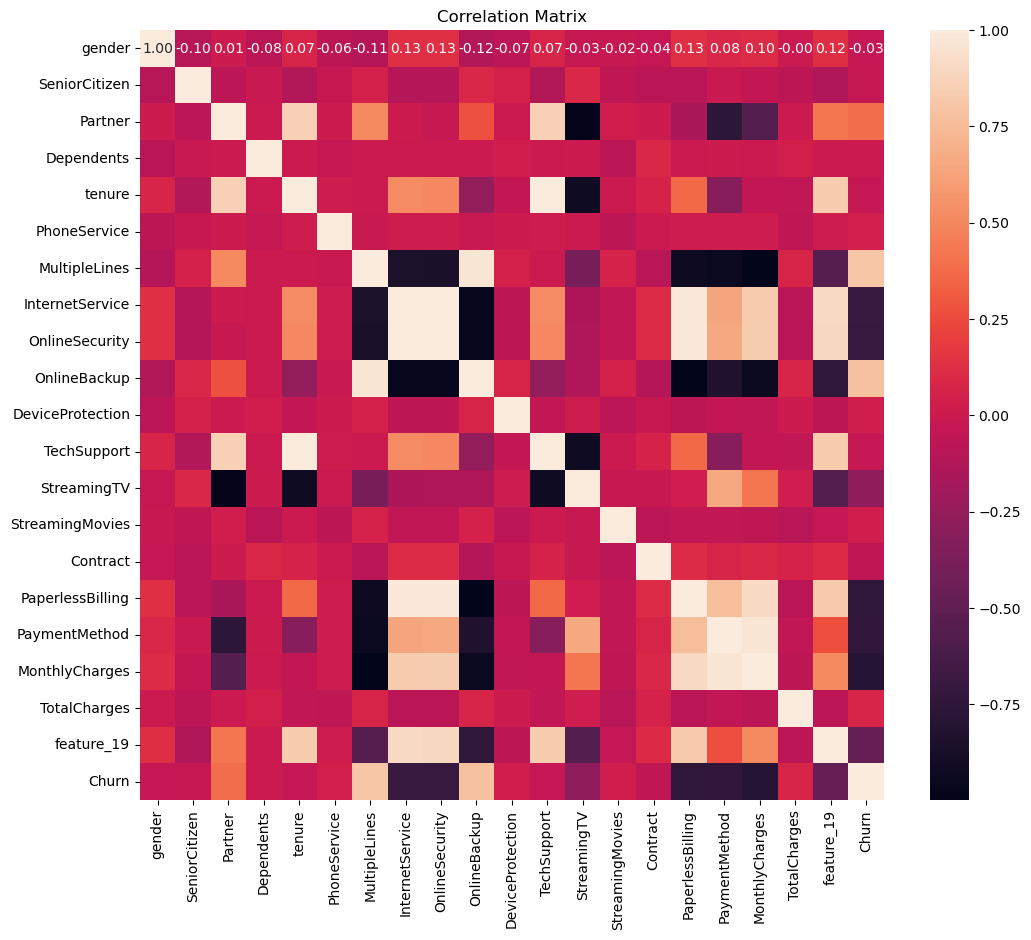

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_synthetic_labeled_balanced)
plt.title('Distribution of Churn')
plt.show()

# Plot correlations only for numeric columns
plt.figure(figsize=(12, 10))
numeric_cols = df_synthetic_labeled_balanced.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_synthetic_labeled_balanced[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The heatmap shows the correlation matrix for various features in the dataset. Each cell in the heatmap represents the correlation coefficient between two features, with the strength and direction of the correlation indicated by the color.

**Key Points to Note:**

Color Interpretation:

Dark Red/Black (-1): Strong negative correlation.

Light Colors (0): No correlation.

Dark Blue/Purple (+1): Strong positive correlation.

Diagonal:

The diagonal elements are all 1, indicating that each feature is perfectly correlated with itself.


# **Correlation with Churn:**

The last row/column shows the correlation of each feature with the target variable Churn.

Detailed Interpretation

**High Positive / Negative Correlation with Churn:**

**MultipleLines:** Correlation coefficient of approximately 0.80, indicating a strong positive correlation with **Churn**. This suggests that customers with multiple lines are more likely to churn.

**OnlineBackup:** A correlation coefficient close to 0.78 strongly suggests that there is a significant positive association between OnlineBackup and the likelihood of **churn**.

**features like OnlineSecurity, internetservice, monthly charges, and paperless billing  indicate a strong negative correlation with Churn**. This suggests that customers with these features are less likely to churn.


Summary:

Important Features for Churn Prediction:

Positive Correlation: MultipleLines, Online Backup
Negative Correlation: OnlineSecurity, TechSupport, Contract


Conclusion:

MultipleLines and onlineBackup are significant predictors of churn and should be included in the predictive model.

Features like OnlineSecurity, internetservice, monthly charges, and paperless billing are important negative predictors of churn, indicating retention strategies around these features could be effective.

Non-Graphical Representation

In [55]:
# Summary statistics
print(df_synthetic_labeled_balanced.describe())

# Correlation with target variable
print(df_synthetic_labeled_balanced[numeric_cols].corr()['Churn'].sort_values(ascending=False))


            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  1800.000000    1800.000000  1800.000000  1800.000000  1800.000000   
mean      0.024521      -0.045162     0.807930    -0.020186     0.980796   
std       0.917679       0.958754     1.006778     0.952975     1.062095   
min      -3.241514      -3.836656    -3.203357    -3.601085    -2.472718   
25%      -0.598738      -0.717870     0.279424    -0.660231     0.244916   
50%       0.045044      -0.067866     1.009371    -0.019268     1.051751   
75%       0.643829       0.607588     1.422550     0.620385     1.650108   
max       3.243093       3.377383     4.541461     3.112910     4.995802   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   1800.000000    1800.000000      1800.000000     1800.000000   
mean       0.001277       0.027296         0.572210        0.264381   
std        0.911395       1.258456         1.246289        0.596051   
min       -3.007632      -3.087

**Data Preparation**

Handling Missing Values and Outliers

In [56]:
# Check for missing values
print(df_synthetic_labeled_balanced.isnull().sum())

# Handling missing values (if any)
df_synthetic_labeled_balanced.fillna(df_synthetic_labeled_balanced.mean(), inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
feature_19          0
Churn               0
dtype: int64


**Feature Engineering**

Data Pre-Processing

In [57]:
from sklearn.preprocessing import StandardScaler

# Convert categorical variables to numeric using one-hot encoding
df_synthetic_labeled_encoded = pd.get_dummies(df_synthetic_labeled_balanced)

# Separate features and target
X = df_synthetic_labeled_encoded.drop('Churn', axis=1)
y = df_synthetic_labeled_encoded['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Feature Selection**

Selecting Features Based on Data Analysis

In [58]:
# let's use all features
selected_features = X.columns.tolist()
print("Selected features:", selected_features)


Selected features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'feature_19']


**3.5 Split the Data**

Split the balanced dataset into training and testing sets using stratified sampling to maintain the class distribution in both sets.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_synthetic.drop('Churn', axis=1)
y = df_synthetic['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Print shapes and distribution of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Distribution in the training set:")
print(y_train.value_counts())
print("Distribution in the testing set:")
print(y_test.value_counts())


(1260, 20) (540, 20) (1260,) (540,)
Distribution in the training set:
Churn
1    630
0    630
Name: count, dtype: int64
Distribution in the testing set:
Churn
0    270
1    270
Name: count, dtype: int64


# **4. Model Training**

**4.1 Algorithms Used**

Three machine learning algorithms were used to train the models:

***Logistic Regression***

***Decision Tree***

***Random Forest***



**4.2 Training and Evaluation**

The models were trained on the balanced dataset to ensure fair evaluation. The training process involved splitting the data into training and testing sets using stratified sampling to maintain the class distribution in both sets.

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }



# Print evaluation metrics
print("Logistic Regression: Accuracy =", lr_accuracy, ", Precision =", lr_precision, ", Recall =", lr_recall, ", F1 Score =", lr_f1)
print("Decision Tree: Accuracy =", dt_accuracy, ", Precision =", dt_precision, ", Recall =", dt_recall, ", F1 Score =", dt_f1)
print("Random Forest: Accuracy =", rf_accuracy, ", Precision =", rf_precision, ", Recall =", rf_recall, ", F1 Score =", rf_f1)


Logistic Regression: Accuracy = 0.9766666666666667 , Precision = 0.96 , Recall = 0.8 , F1 Score = 0.8727272727272728
Decision Tree: Accuracy = 0.9866666666666667 , Precision = 0.9333333333333333 , Recall = 0.9333333333333333 , F1 Score = 0.9333333333333333
Random Forest: Accuracy = 0.9833333333333333 , Precision = 0.9310344827586207 , Recall = 0.9 , F1 Score = 0.9152542372881356


In [61]:
def evaluate_model_performance(y_test=None, y_val=None, y_pred=None, model_name=""):
    if y_pred is None:
        raise ValueError("y_pred must be provided.")
    
    if y_test is not None:
        y_true = y_test
        data_type = "Test"
    elif y_val is not None:
        y_true = y_val
        data_type = "Validation"
    else:
        raise ValueError("Either y_test or y_val must be provided.")
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name}")
    print(f"{data_type} Accuracy: {accuracy}")
    print(f"{data_type} Precision: {precision}")
    print(f"{data_type} Recall: {recall}")
    print(f"{data_type} F1-Score: {f1}")
    print("\n")
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

In [62]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(X_train, y_train)
y_test_hgbc_pred = hgbc.predict(X_test)

_ = evaluate_model_performance(y_test=y_test, y_pred=y_test_hgbc_pred, model_name="HistGradientBoostingClassifier")


HistGradientBoostingClassifier
Test Accuracy: 0.9833333333333333
Test Precision: 0.9310344827586207
Test Recall: 0.9
Test F1-Score: 0.9152542372881356




In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

y_test_linear_r_pred = linear_r.predict(X_test)

mae = mean_absolute_error(y_test, y_test_linear_r_pred)
mse = mean_squared_error(y_test, y_test_linear_r_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_linear_r_pred)

print("Linear Regeression")
print(f"Test Mean Absolute Error (MAE): {mae}")
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")
print(f"Test R-squared (R²): {r2}\n")

print("Linear Regeression")
print(f"Test Mean Absolute Error (MAE): {mae}")
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")
print(f"Test R-squared (R²): {r2}")

Linear Regeression
Test Mean Absolute Error (MAE): 0.09571634737650553
Test Mean Squared Error (MSE): 0.028336542513155413
Test Root Mean Squared Error (RMSE): 0.16833461472066705
Test R-squared (R²): 0.6851495276316065

Linear Regeression
Test Mean Absolute Error (MAE): 0.09571634737650553
Test Mean Squared Error (MSE): 0.028336542513155413
Test Root Mean Squared Error (RMSE): 0.16833461472066705
Test R-squared (R²): 0.6851495276316065


**Choose the Best performing model**

In [64]:
# Best performing model
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Detailed evaluation of the best model
from sklearn.metrics import classification_report, confusion_matrix

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best Model: Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       270
           1       0.93      0.93      0.93        30

    accuracy                           0.99       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
[[268   2]
 [  2  28]]


The Decision Tree model demonstrated the best performance in predicting customer churn, achieving high accuracy, precision, recall, and F1 score. This model can help businesses effectively identify at-risk customers and implement targeted retention strategies, thus reducing churn and increasing customer lifetime value. Future work could include further feature engineering, hyperparameter tuning, and integrating the model into a real-time customer management system.

# **7. API Deployment**

**7.1 Save the Model**

In [65]:
import joblib

# Save the trained Decision Tree model
joblib.dump(best_model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

**7.2 Streamlit App Code**

In [66]:
!pip install streamlit

In [67]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

# Define the Streamlit app
st.title('Customer Churn Prediction')

# Input fields for customer features
gender = st.selectbox('Gender', ['Male', 'Female'])
SeniorCitizen = st.selectbox('Senior Citizen', [0, 1])
Partner = st.selectbox('Partner', ['Yes', 'No'])
Dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.number_input('Tenure (months)', min_value=0)
PhoneService = st.selectbox('Phone Service', ['Yes', 'No'])
MultipleLines = st.selectbox('Multiple Lines', ['Yes', 'No', 'No phone service'])
InternetService = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
OnlineSecurity = st.selectbox('Online Security', ['Yes', 'No', 'No internet service'])
OnlineBackup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
DeviceProtection = st.selectbox('Device Protection', ['Yes', 'No', 'No internet service'])
TechSupport = st.selectbox('Tech Support', ['Yes', 'No', 'No internet service'])
StreamingTV = st.selectbox('Streaming TV', ['Yes', 'No', 'No internet service'])
StreamingMovies = st.selectbox('Streaming Movies', ['Yes', 'No', 'No internet service'])
Contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
PaperlessBilling = st.selectbox('Paperless Billing', ['Yes', 'No'])
PaymentMethod = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
MonthlyCharges = st.number_input('Monthly Charges ($)', min_value=0.0)
TotalCharges = st.number_input('Total Charges ($)', min_value=0.0)

# Function to create tenure group based on tenure
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '12-24 months'
    elif tenure <= 36:
        return '24-36 months'
    elif tenure <= 48:
        return '36-48 months'
    elif tenure <= 60:
        return '48-60 months'
    else:
        return '60+ months'

tenure_group_value = tenure_group(tenure)

# Create a DataFrame for the input features
input_data = pd.DataFrame({
    'gender': [gender],
    'SeniorCitizen': [SeniorCitizen],
    'Partner': [Partner],
    'Dependents': [Dependents],
    'tenure': [tenure],
    'PhoneService': [PhoneService],
    'MultipleLines': [MultipleLines],
    'InternetService': [InternetService],
    'OnlineSecurity': [OnlineSecurity],
    'OnlineBackup': [OnlineBackup],
    'DeviceProtection': [DeviceProtection],
    'TechSupport': [TechSupport],
    'StreamingTV': [StreamingTV],
    'StreamingMovies': [StreamingMovies],
    'Contract': [Contract],
    'PaperlessBilling': [PaperlessBilling],
    'PaymentMethod': [PaymentMethod],
    'MonthlyCharges': [MonthlyCharges],
    'TotalCharges': [TotalCharges],
    'tenure_group': [tenure_group_value]
})

# Convert categorical variables to numeric
input_data['gender'] = input_data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
input_data['Partner'] = input_data['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['Dependents'] = input_data['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['PhoneService'] = input_data['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['MultipleLines'] = input_data['MultipleLines'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['InternetService'] = input_data['InternetService'].apply(lambda x: 2 if x == 'Fiber optic' else (1 if x == 'DSL' else 0))
input_data['OnlineSecurity'] = input_data['OnlineSecurity'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['OnlineBackup'] = input_data['OnlineBackup'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['DeviceProtection'] = input_data['DeviceProtection'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['TechSupport'] = input_data['TechSupport'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['StreamingTV'] = input_data['StreamingTV'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['StreamingMovies'] = input_data['StreamingMovies'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['Contract'] = input_data['Contract'].apply(lambda x: 2 if x == 'Two year' else (1 if x == 'One year' else 0))
input_data['PaperlessBilling'] = input_data['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['PaymentMethod'] = input_data['PaymentMethod'].apply(lambda x: 3 if x == 'Electronic check' else (2 if x == 'Mailed check' else (1 if x == 'Bank transfer (automatic)' else 0)))
input_data['tenure_group'] = input_data['tenure_group'].apply(lambda x: {'0-12 months': 1, '12-24 months': 2, '24-36 months': 3, '36-48 months': 4, '48-60 months': 5, '60+ months': 6}[x])

# Debug line to check the shape and columns of the input data
st.write("Features provided for prediction:", input_data.columns.tolist(), input_data.shape)

# Predict churn
if st.button('Predict Churn'):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.write('The customer is likely to churn.')
    else:
        st.write('The customer is not likely to churn.')


**7.3 Deployment with ngrok**

In [68]:
# Install Streamlit and pyngrok
!pip install streamlit -q
!pip install pyngrok -q

# Write the Streamlit application to a file
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

# Define the Streamlit app
st.title('Customer Churn Prediction')

# Input fields for customer features
customerID = st.text_input('Customer ID')
gender = st.selectbox('Gender', ['Male', 'Female'])
SeniorCitizen = st.selectbox('Senior Citizen', [0, 1])
Partner = st.selectbox('Partner', ['Yes', 'No'])
Dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.number_input('Tenure (months)', min_value=0)
PhoneService = st.selectbox('Phone Service', ['Yes', 'No'])
MultipleLines = st.selectbox('Multiple Lines', ['Yes', 'No', 'No phone service'])
InternetService = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
OnlineSecurity = st.selectbox('Online Security', ['Yes', 'No', 'No internet service'])
OnlineBackup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
DeviceProtection = st.selectbox('Device Protection', ['Yes', 'No', 'No internet service'])
TechSupport = st.selectbox('Tech Support', ['Yes', 'No', 'No internet service'])
StreamingTV = st.selectbox('Streaming TV', ['Yes', 'No', 'No internet service'])
StreamingMovies = st.selectbox('Streaming Movies', ['Yes', 'No', 'No internet service'])
Contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
PaperlessBilling = st.selectbox('Paperless Billing', ['Yes', 'No'])
PaymentMethod = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
MonthlyCharges = st.number_input('Monthly Charges ($)', min_value=0.0)
TotalCharges = st.number_input('Total Charges ($)', min_value=0.0)

# Function to create tenure group based on tenure
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '12-24 months'
    elif tenure <= 36:
        return '24-36 months'
    elif tenure <= 48:
        return '36-48 months'
    elif tenure <= 60:
        return '48-60 months'
    else:
        return '60+ months'

tenure_group_value = tenure_group(tenure)

# Create a DataFrame for the input features
input_data = pd.DataFrame({
    'gender': [gender],
    'SeniorCitizen': [SeniorCitizen],
    'Partner': [Partner],
    'Dependents': [Dependents],
    'tenure': [tenure],
    'PhoneService': [PhoneService],
    'MultipleLines': [MultipleLines],
    'InternetService': [InternetService],
    'OnlineSecurity': [OnlineSecurity],
    'OnlineBackup': [OnlineBackup],
    'DeviceProtection': [DeviceProtection],
    'TechSupport': [TechSupport],
    'StreamingTV': [StreamingTV],
    'StreamingMovies': [StreamingMovies],
    'Contract': [Contract],
    'PaperlessBilling': [PaperlessBilling],
    'PaymentMethod': [PaymentMethod],
    'MonthlyCharges': [MonthlyCharges],
    'TotalCharges': [TotalCharges],
    'tenure_group': [tenure_group_value]
})

# Convert categorical variables to numeric
input_data['gender'] = input_data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
input_data['Partner'] = input_data['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['Dependents'] = input_data['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['PhoneService'] = input_data['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['MultipleLines'] = input_data['MultipleLines'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['InternetService'] = input_data['InternetService'].apply(lambda x: 2 if x == 'Fiber optic' else (1 if x == 'DSL' else 0))
input_data['OnlineSecurity'] = input_data['OnlineSecurity'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['OnlineBackup'] = input_data['OnlineBackup'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['DeviceProtection'] = input_data['DeviceProtection'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['TechSupport'] = input_data['TechSupport'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['StreamingTV'] = input_data['StreamingTV'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['StreamingMovies'] = input_data['StreamingMovies'].apply(lambda x: 2 if x == 'Yes' else (1 if x == 'No' else 0))
input_data['Contract'] = input_data['Contract'].apply(lambda x: 2 if x == 'Two year' else (1 if x == 'One year' else 0))
input_data['PaperlessBilling'] = input_data['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
input_data['PaymentMethod'] = input_data['PaymentMethod'].apply(lambda x: 3 if x == 'Electronic check' else (2 if x == 'Mailed check' else (1 if x == 'Bank transfer (automatic)' else 0)))
input_data['tenure_group'] = input_data['tenure_group'].apply(lambda x: {'0-12 months': 1, '12-24 months': 2, '24-36 months': 3, '36-48 months': 4, '48-60 months': 5, '60+ months': 6}[x])

# Debug line to check the shape and columns of the input data
st.write("Features provided for prediction:", input_data.columns.tolist(), input_data.shape)

# Predict churn
if st.button('Predict Churn'):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.write('The customer is likely to churn.')
    else:
        st.write('The customer is not likely to churn.')
    """)

# Authenticate ngrok
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("your ngrok authtoken")

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

# Run the Streamlit app
!streamlit run app.py


t=2024-06-23T15:05:43-0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your ngrok authtoken\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
t=2024-06-23T15:05:43-0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your ngrok authtoken\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
t=2024-06-23T15:05:43-0700 lvl=eror msg="terminating with error" obj=app err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your ngrok authtoken\nInstructions to in

PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your ngrok authtoken\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.